# Analysis of WorldBank Climate Data
https://climateknowledgeportal.worldbank.org/download-data

# General

## Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from countries import get_country_list

## Constants

In [92]:
TEMP_DATA = 'data/climate/temperature_data_1991_2016.csv'
RAIN_DATA = 'data/climate/rain_data_1991_2016.csv'

# Temperature Data

## Load and Transform Data

In [51]:
data_temp = pd.read_csv(
    TEMP_DATA,
    sep=',',
    names=['Temperature', 'Year', 'Statistics', 'Country', 'ISO_Country',
           '_']).drop(0)
data_temp['Month'] = data_temp['Statistics'].apply(lambda x: x.split()[0])
data_temp['Country'] = data_temp['Country'].apply(lambda x: x.lstrip())
data_temp['Temperature'] = data_temp['Temperature'].astype(float)
data_temp = data_temp[['Temperature', 'Year', 'Month', 'Country']]

## Overview

In [31]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61152 entries, 1 to 61152
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  61152 non-null  float64
 1   Year         61152 non-null  object 
 2   Month        61152 non-null  object 
 3   Country      61152 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.3+ MB


### Temperature

count    61152.000000
mean        19.224302
std         10.136161
min        -30.859000
25%         13.824000
50%         23.322650
75%         26.244025
max         38.566900
Name: Temperature, dtype: float64

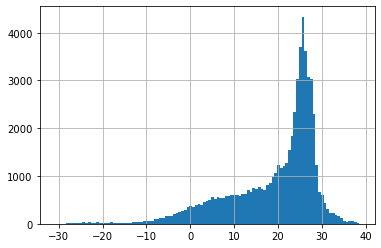

In [30]:
data_temp['Temperature'].hist(bins='auto')
data_temp['Temperature'].describe()

### Year

In [43]:
display(data_temp['Year'].describe())
data_temp['Year'].value_counts()

count     61152
unique       26
top        2012
freq       2352
Name: Year, dtype: object

 2012    2352
 2010    2352
 2004    2352
 2001    2352
 2009    2352
 2007    2352
 1997    2352
 1993    2352
 2016    2352
 1991    2352
 2008    2352
 2006    2352
 1995    2352
 2014    2352
 2000    2352
 2003    2352
 2015    2352
 2013    2352
 2005    2352
 1994    2352
 1999    2352
 1996    2352
 1998    2352
 2002    2352
 1992    2352
 2011    2352
Name: Year, dtype: int64

### Month

In [45]:
display(data_temp['Month'].describe())
data_temp['Month'].value_counts()

count     61152
unique       12
top         Aug
freq       5096
Name: Month, dtype: object

Aug    5096
Mar    5096
Sep    5096
Jun    5096
May    5096
Nov    5096
Jul    5096
Jan    5096
Feb    5096
Apr    5096
Dec    5096
Oct    5096
Name: Month, dtype: int64

### Country

In [52]:
display(data_temp['Country'].describe())
data_temp['Country'].unique()

count     61152
unique      195
top       Korea
freq        624
Name: Country, dtype: object

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Democratic Republic of the)', 'Congo (Republic of the)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Federated States of Micronesia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'G

#### Check if data contains all Countries we have in our country list

In [53]:
set(get_country_list()).difference(set(data_temp['Country'].unique()))

{'Slovak Republic'}

--> Slovakia has to be renamed to Slovak Republic

In [56]:
data_temp.loc[data_temp['Country'] == 'Slovakia', 'Country'] = 'Slovak Republic'
set(get_country_list()).difference(set(data_temp['Country'].unique()))

set()

# Rainfall Data

## Load and Transform Data

In [96]:
data_rain = pd.read_csv(RAIN_DATA, sep=',',
    names=['Rainfall', 'Year', 'Statistics', 'Country', 'ISO_Country',
           '_']).drop(0)
data_rain['Rainfall'] = data_rain['Rainfall'].astype(float)
data_rain['Month'] = data_rain['Statistics'].apply(lambda x: x.split()[0])
data_rain['Country'] = data_rain['Country'].apply(lambda x: x.lstrip())

## Overview

In [97]:
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61152 entries, 1 to 61152
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rainfall     61152 non-null  float64
 1   Year         61152 non-null  object 
 2   Statistics   61152 non-null  object 
 3   Country      61152 non-null  object 
 4   ISO_Country  61152 non-null  object 
 5   _            1560 non-null   object 
 6   Month        61152 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.7+ MB


### Rainfall

count    61152.000000
mean       103.581125
std        114.130057
min          0.000000
25%         24.123175
50%         66.192300
75%        149.172000
max       2699.190000
Name: Rainfall, dtype: float64

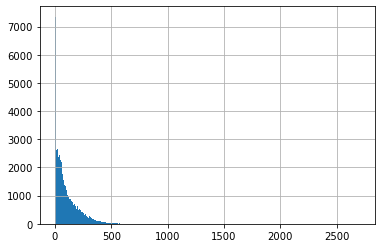

In [101]:
data_rain['Rainfall'].hist(bins='auto')
data_rain['Rainfall'].describe()

### Year

In [102]:
display(data_rain['Year'].describe())
data_rain['Year'].value_counts()

count     61152
unique       26
top        2012
freq       2352
Name: Year, dtype: object

 2012    2352
 2010    2352
 2004    2352
 2001    2352
 2009    2352
 2007    2352
 1997    2352
 1993    2352
 2016    2352
 1991    2352
 2008    2352
 2006    2352
 1995    2352
 2014    2352
 2000    2352
 2003    2352
 2015    2352
 2013    2352
 2005    2352
 1994    2352
 1999    2352
 1996    2352
 1998    2352
 2002    2352
 1992    2352
 2011    2352
Name: Year, dtype: int64

### Month

In [103]:
display(data_rain['Month'].describe())
data_rain['Month'].value_counts()

count     61152
unique       12
top         Aug
freq       5096
Name: Month, dtype: object

Aug    5096
Mar    5096
Sep    5096
Jun    5096
May    5096
Nov    5096
Jul    5096
Jan    5096
Feb    5096
Apr    5096
Dec    5096
Oct    5096
Name: Month, dtype: int64

### Country

In [104]:
display(data_rain['Country'].describe())
data_rain['Country'].unique()

count     61152
unique      195
top       Korea
freq        624
Name: Country, dtype: object

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Democratic Republic of the)', 'Congo (Republic of the)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Federated States of Micronesia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'G

#### Check if data contains all Countries we have in our country list

In [108]:
set(get_country_list()).difference(set(data_rain['Country'].unique()))

set()

--> Slovakia has to be renamed to Slovak Republic

In [107]:
data_rain.loc[data_rain['Country'] == 'Slovakia', 'Country'] = 'Slovak Republic'
set(get_country_list()).difference(set(data_rain['Country'].unique()))

set()

# Merge Datasets

## Check if Countries, Years and Months are identical

In [111]:
country_temp = set(data_temp['Country'].unique())
country_rain = set(data_rain['Country'].unique())
country_temp == country_rain

True

In [112]:
year_temp = set(data_temp['Year'].unique())
year_rain = set(data_rain['Year'].unique())
year_temp == year_rain

True

In [113]:
month_temp = set(data_temp['Month'].unique())
month_rain = set(data_rain['Month'].unique())
month_temp == month_rain

True

## Merge

In [115]:
data_full = data_temp.merge(data_rain)

# Show change over time for all countries averaged

### GroupBy Year and Country

In [120]:
by_year = data_full.groupby(['Year', 'Country']).agg(np.mean).reset_index()

In [124]:
by_year

,Year,Country,Temperature,Rainfall
8,1991,Australia,22.145483,38.304117
9,1991,Austria,6.181208,94.700700
16,1991,Belgium,9.694502,62.917958
30,1991,Canada,-6.548698,39.092650
45,1991,Czech Republic,7.763168,48.954100
...,...,...,...,...
5035,2016,Spain,14.283411,52.344237
5043,2016,Sweden,2.934867,54.674733
5044,2016,Switzerland,7.135720,137.437713
5060,2016,United Kingdom,9.237765,101.756558


### Only show OECD Countries

In [121]:
by_year = by_year[by_year['Country'].isin(get_country_list())]

### Plot Average Temperature by Country over Time

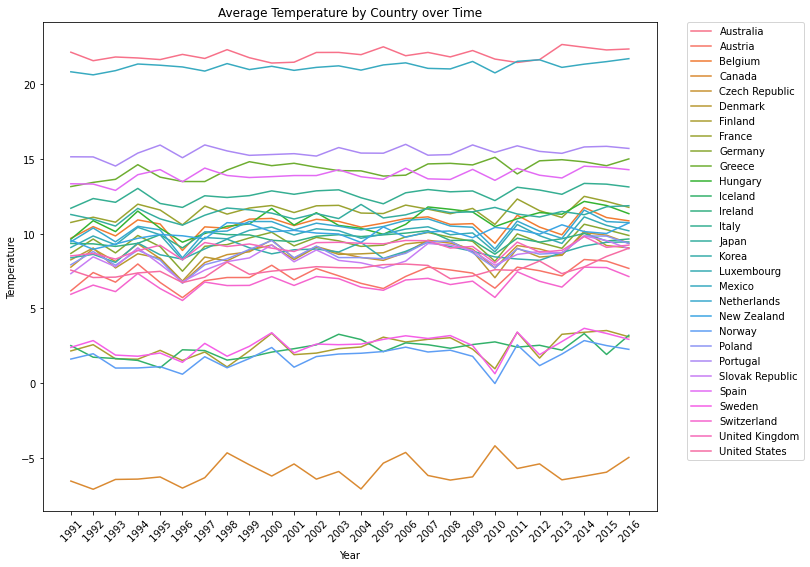

In [122]:
fig, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Average Temperature by Country over Time')

sns.lineplot(data=by_year.reset_index(),
             x='Year',
             y='Temperature',
             hue='Country')
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Plot Average Rainfall by Country over Time

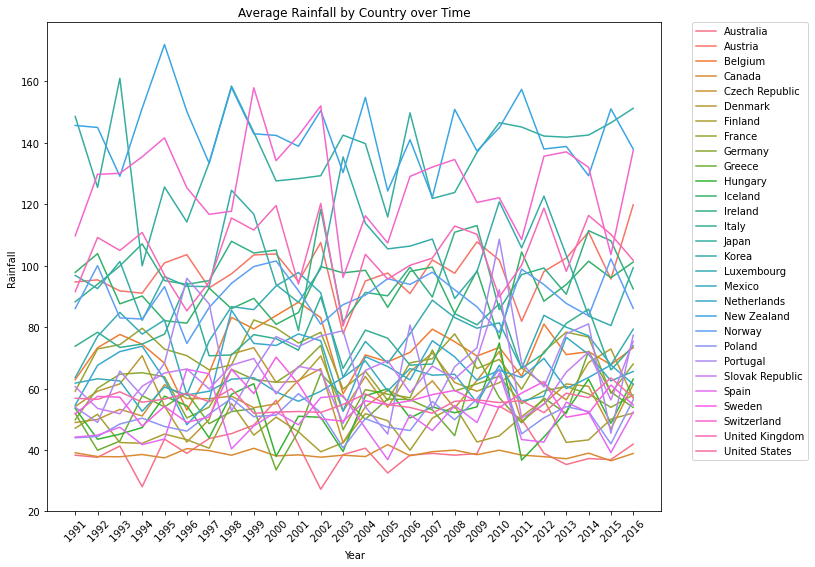

In [123]:
fig, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Average Rainfall by Country over Time')

sns.lineplot(data=by_year.reset_index(),
             x='Year',
             y='Rainfall',
             hue='Country')
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()